# **Sprawozdanie 1**

**Imie i nazwisko:** Aleksei Haidukevich 295233

# Zadanie 1 

(z poprzednich cwiczen):
Wysegmentuj kazdy z trzech samochodow. obraz= https://klassikauto.pl/wp-content/uploads/2019/05/zloty_tyt-2.jpg

### Oryginalnie zdjęcie

In [1]:
from skimage import io
from skimage.color import rgb2hsv, hsv2rgb
import numpy as np
from matplotlib import pyplot as plt

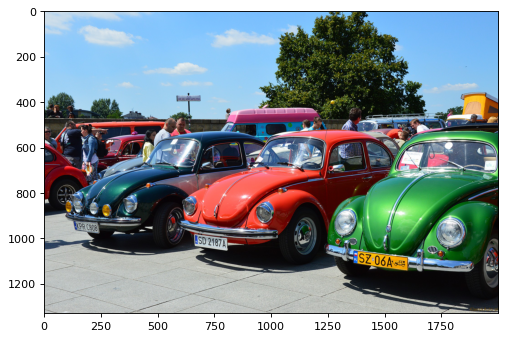

In [2]:
url = 'https://sun9-4.userapi.com/impf/oeqlA_1owyig1GKqGCsLIiUOTbSR2_yE6ruH6Q/1LzFwl8yOcY.jpg?size=2000x1330&quality=96&sign=64668aa6f5291b6eb66edc51f83d7a45&type=album'
org = np.array(io.imread(url))

plt.figure(figsize=(8, 5), dpi=80)
plt.imshow( org )

### Podejście 1: Odcinanie RGB

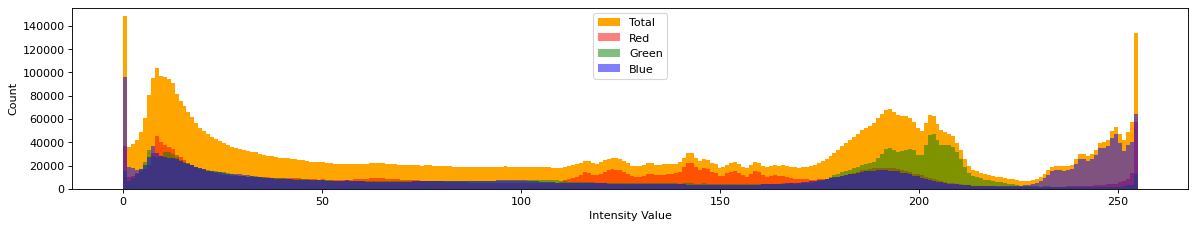

In [3]:
def histogram( img, title ):
    
    plt.hist(img.ravel(), bins = 256, color = 'orange', )
    plt.hist(img[:, :, 0].ravel(), bins = 256, color = 'Red', alpha = 0.5)
    plt.hist(img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
    plt.hist(img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
    plt.xlabel('Intensity Value')
    plt.ylabel('Count')
    plt.legend(['Total'] + title.split())

plt.figure(figsize=(18, 3), dpi=80)
histogram(org, 'Red Green Blue')

In [4]:
# Jaki procent obrazu zostaje po nałożeniu maski

def percent_filtered( m ):
    truths = np.count_nonzero( m == True )
    print('Remained:', round((m.size - truths)*100 / m.size, 2), '%' )

In [5]:
# Wypełnij białym wszystkie pixele bliskie określonej wartości

def remove_color( a, rgb, margin ):
    
    red_margin = (a[ :,:,0 ] >= (rgb[0]-margin)) * (a[ :,:,0 ] <= (rgb[0]+margin))
    green_margin = (a[ :,:,1 ] >= (rgb[1]-margin)) * (a[ :,:,1 ] <= (rgb[1]+margin))
    blue_margin = (a[ :,:,2 ] >= (rgb[2]-margin)) * (a[ :,:,2 ] <= (rgb[2]+margin))
    mask = red_margin * green_margin * blue_margin

    a[mask] = 255
    percent_filtered(mask)

In [6]:
# Używałem color picker aby znaleźć wartości RGB dla części obrazu które chciałem wyciąć
# Wycinałem wszystkie kolory podobne do tych co nie należą do samochodów
# Wybrałem takie podejście, skoro uznałem, że jest to prostsza metoda, niż wyodrębnienie poszczególnych barw
# (histogram pokazuje mocne nałożenie dystrybujci, nie ma trzech wyraźnych mod)

removals = {
    'sky': ((152,207,246), 60),
    'floor': ((173,179,177), 40),
    'leaves': ((76,80,8), 60),
    'sky': ((152,207,246), 40),
    'clouds': ((203,220,236), 20),
    'dark': ((20,20,20), 20),
    # 'more leaves': ((41,45,37), 40),
    # 'pink': ((171,70,118), 60),
    # 'yellow': ((253,181,20), 60)
}

Removed sky. Remained: 76.2 %
Removed floor. Remained: 84.27 %
Removed leaves. Remained: 86.85 %
Removed clouds. Remained: 98.21 %
Removed dark. Remained: 84.8 %


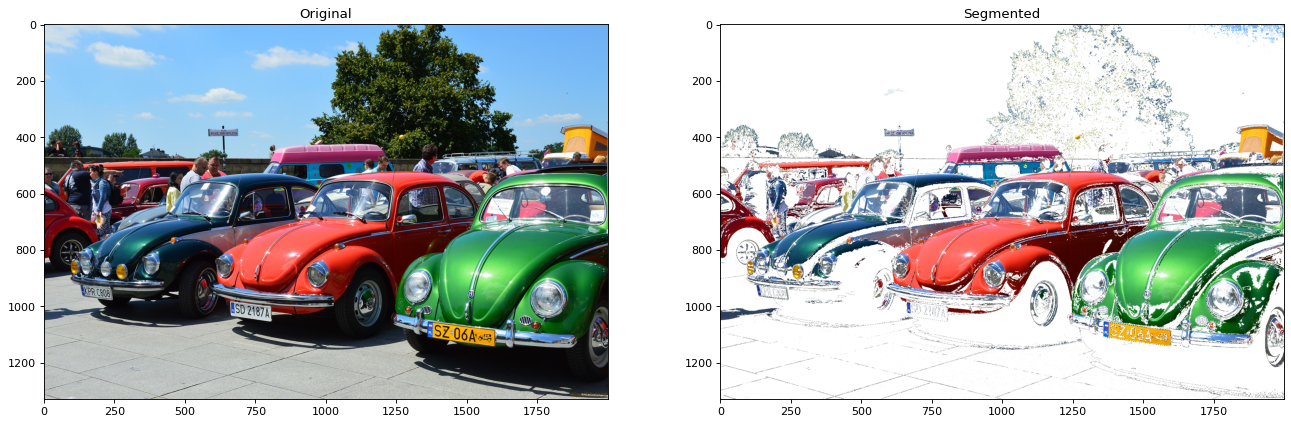

In [7]:
# Nałożenie wszystkich masek

app = org.copy()

plt.figure(figsize=(20, 8), dpi=80)
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(app)

for k, v in removals.items():
    print( f'Removed {k}', end='. ' )
    remove_color( app, v[0], v[1] )


plt.subplot(1, 2, 2)
plt.title('Segmented')
plt.imshow(app)

### Podejście 2: HSV

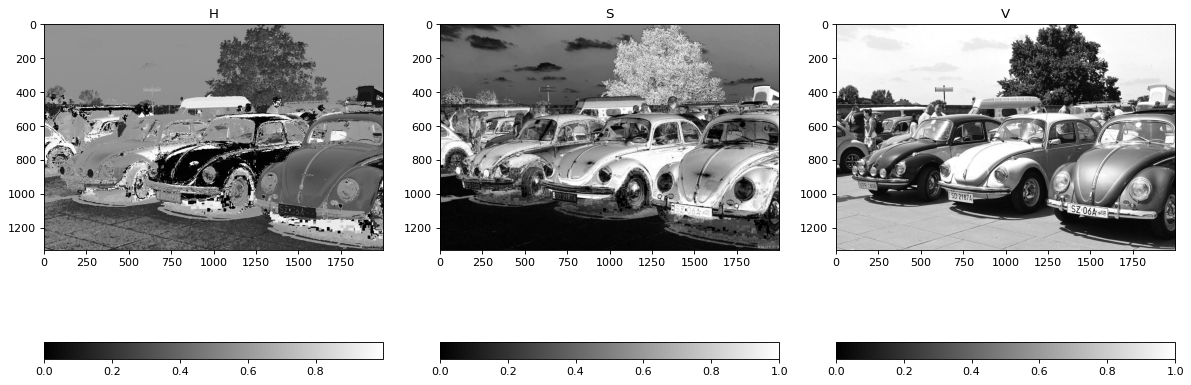

In [8]:
# Kolejny pomysł: być może dla HSV będą lepsze wyniki?

org_hsv = rgb2hsv(org)

plt.figure(figsize=(15, 8), dpi=80)
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title('HSV'[i])
    plt.imshow( org_hsv[:,:,i], cmap='gray' )
    plt.colorbar( orientation="horizontal")
plt.tight_layout()

In [9]:
# Połączona maska dla trzech składowych które mają wyodrębnić centralny samochód
# Mnożenie booleanów jest tożsame z jednoczesnym nakładaniem masek (logiczne AND)

center_mask_H = (org_hsv[ :,:, 0 ] <= 0.1)
center_mask_S = (org_hsv[ :,:, 1 ] >= 0.3)
center_mask_V = (org_hsv[ :,:, 2 ] >= 0.2)

center_mask = center_mask_H * center_mask_V * center_mask_S
percent_filtered( center_mask )

Remained: 93.2 %


In [10]:
# -//- prawy samochód

right_mask_H = ((org_hsv[ :,:, 0 ] >= 0.35) & (org_hsv[ :,:, 0 ] <= 0.8))
right_mask_S = (org_hsv[ :,:, 1 ] >= 0.2)
right_mask_V = ((org_hsv[ :,:, 2 ] >= 0.2) & (org_hsv[ :,:, 2 ] <= 0.85))

right_mask = right_mask_H * right_mask_S * right_mask_V
percent_filtered( right_mask )

Remained: 84.76 %


In [11]:
# Dodawanie booleanów jest tożsame z aktywacją dowolnej z masek (logiczne OR)
# Dla lewego samochodu nie udało się zrobić dobrej maski
mask = center_mask + right_mask

In [12]:
# Dla HSV wypełniam wartością 0

app2 = org_hsv.copy()
app2[~mask] = 0

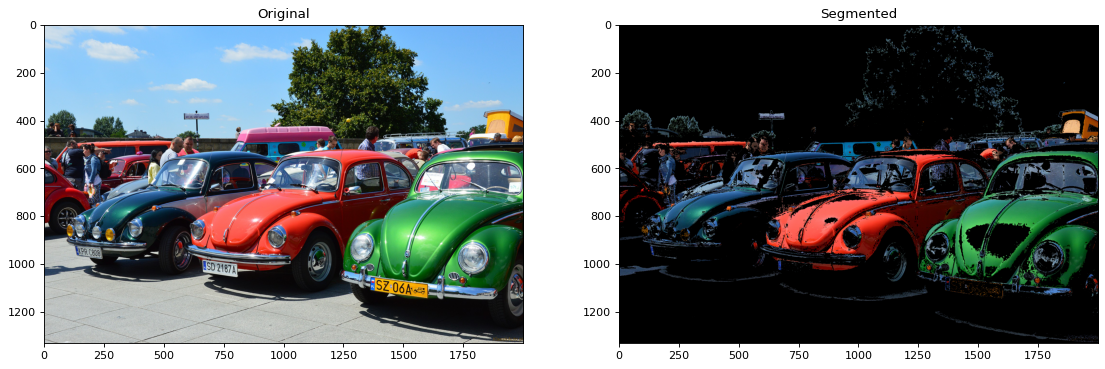

In [13]:
app2 = hsv2rgb(app2)

plt.figure(figsize=(17, 8), dpi=80)
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(org)

plt.subplot(1, 2, 2)
plt.title('Segmented')
plt.imshow(app2)

### Porównanie wyników, wnioski i obserwacje

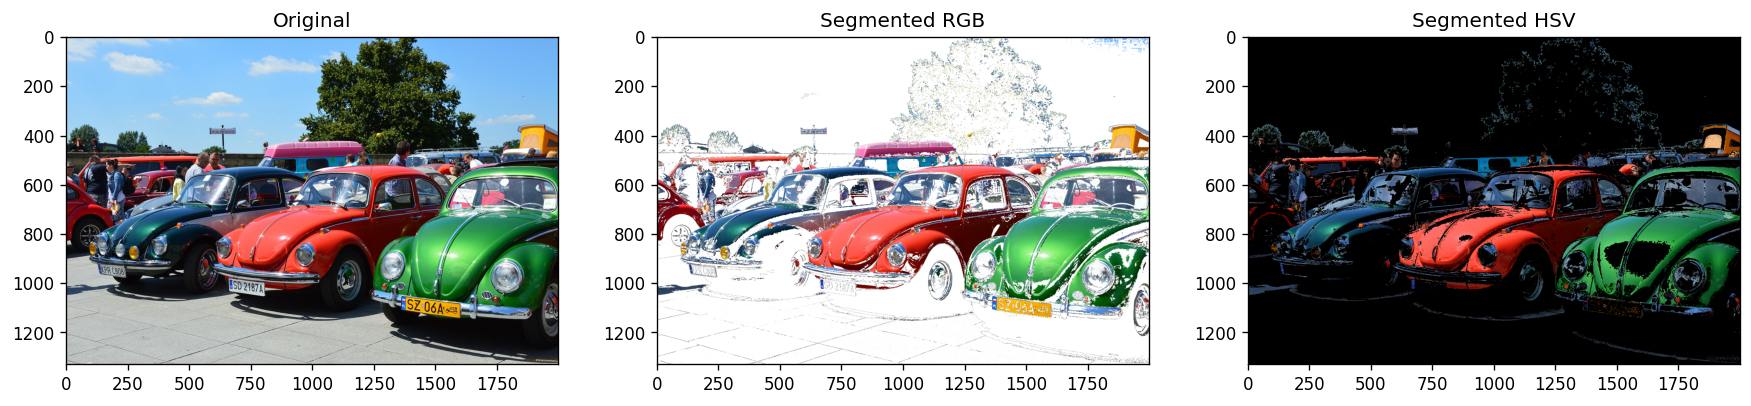

In [14]:
plt.figure(figsize=(18, 10), dpi=120)

plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(org)

plt.subplot(1, 3, 2)
plt.title('Segmented RGB')
plt.imshow(app)

plt.subplot(1, 3, 3)
plt.title('Segmented HSV')
plt.imshow(app2)

Wnioski:

* Wybrany obraz źle nadaje się do segmentacji przez próbkowanie, dobór granic dla poszczególnych składowych jest dość nudnym procesem.

* Uznaję, że segmentacja obrazu HSV jest wydajniejsza niż RGB (np. praktycznie nie widać drzewa w tle), regiony zawierające najwięcej informacji są najmniej uległe wypełnieniu zerami - w przeciwieństwie od RGB, gdzie dość dużo szczegółów zachowało się nawet w wypełnionych regionach (podłoga, drzewo).

* Możliwie, segmentacja z automatycznie dobranyi progami mogłaby służyć lepszym rozwiązaniem zadania.

# Zadanie 2

Wysegmenuj naczynia krwionosne wewnatrz galki ocznej

## Preparations

* Zdefiniowałem szereg niezbędnych funkcji

* Zielony kanał najlepiej wyodrębnia naczynia krwionosne, więc mianowicie ten kanał będzie użyty jako podstawa segmentacji

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2gray, label2rgb
from skimage.measure import label
from skimage.morphology import white_tophat, disk, dilation

In [16]:
def normalize( img ):
    a = np.sort(img.ravel()).searchsorted( img )
    return (a - np.min(a)) / np.max(a)

def show( img, title='Image' ):
    plt.figure(figsize=(10, 6), dpi=120)
    plt.title( title )
    plt.imshow( img, cmap='gray' )

def black_white( arr, th ):
    arr[ arr >= th ] = 1
    arr[ arr < th ] = 0
    return arr

(1411, 1411, 3)

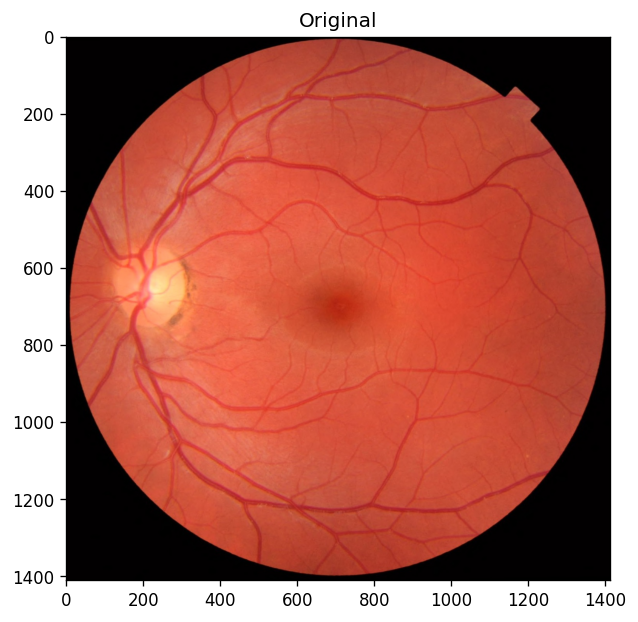

In [17]:
org = data.retina()
show(org, 'Original')
org.shape

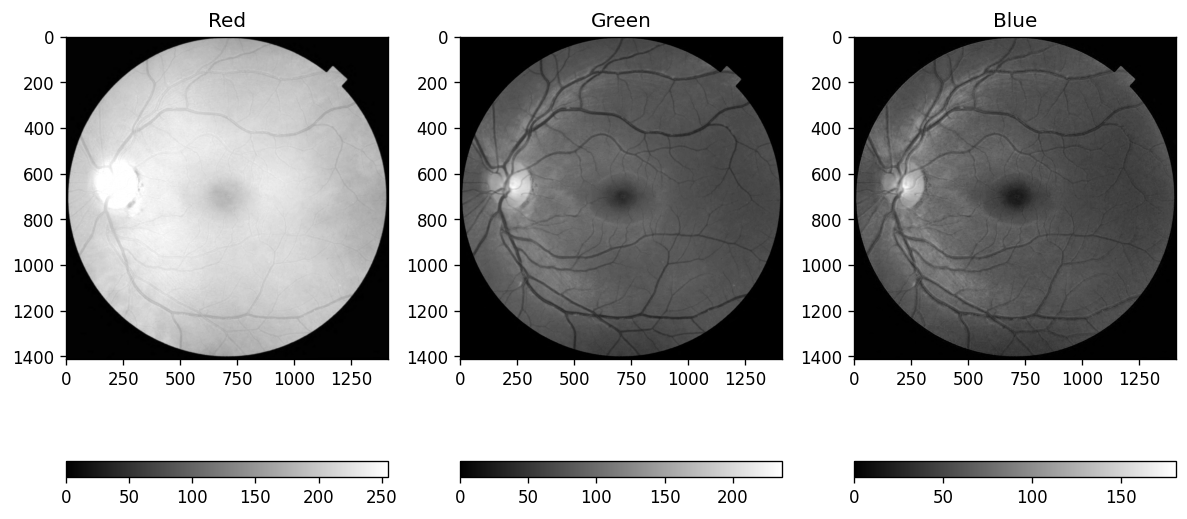

In [18]:
plt.figure(figsize=(10, 6), dpi=120)
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(org[:, :, i], cmap='gray')
    plt.title(['Red', 'Green', 'Blue'][i])
    plt.colorbar( orientation="horizontal" )
plt.tight_layout()

### Pipeline

Szereg operacji, przez które przechodzą oryginalne obrazy. Wartości progu i footprintów została dobrana eksperymentalnie.

* Green Channel Separation: wyodrębnia zielony kanał
* Histogram Normalization: spłaszcza histogram
* Negation: odwraca obrazek (pomaga operacji tophat)
* White Tophat: wyodrębnia naczynia krwionosne
* Black & White: zwiększa kontrast
* Dilation: łączy niepołączone elementy obrazu

In [19]:
pipeline = {
            
            'Green Channel Separation': lambda arr: arr[:,:,1],
            'Histogram Normalization': normalize,
            'Negation': lambda arr: 1 - arr,
            'White Tophat, disk=14': lambda arr: white_tophat(arr, disk(14)),
            'Black & White, th=0.25': lambda arr: black_white( arr, th=0.25 ),
            'Dilation, disk=2': lambda arr: dilation(arr, disk(2)),
            
}

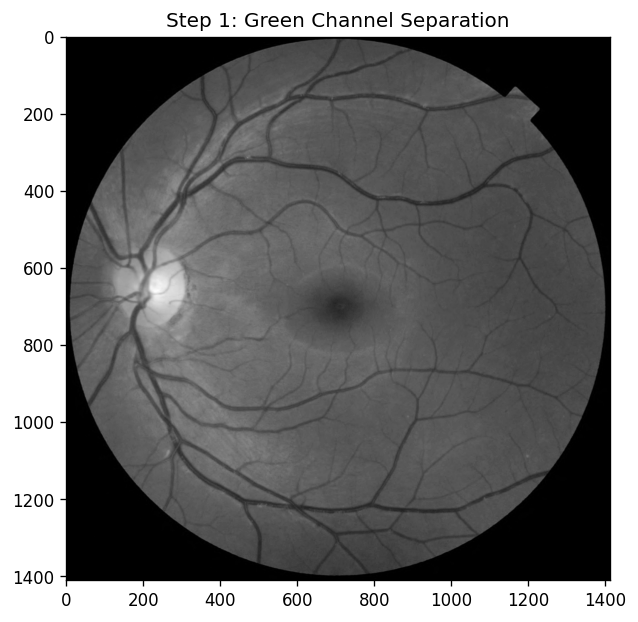

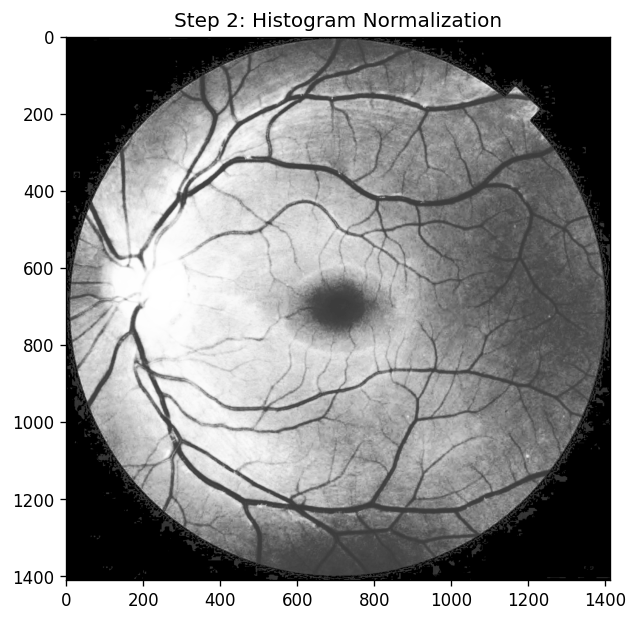

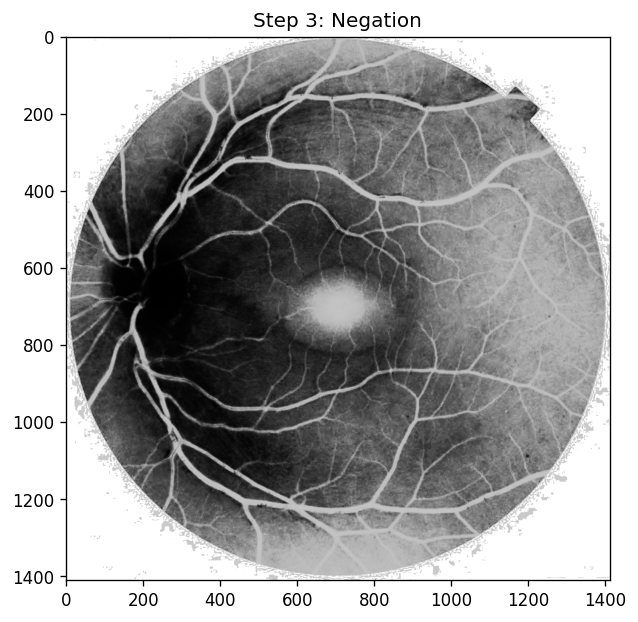

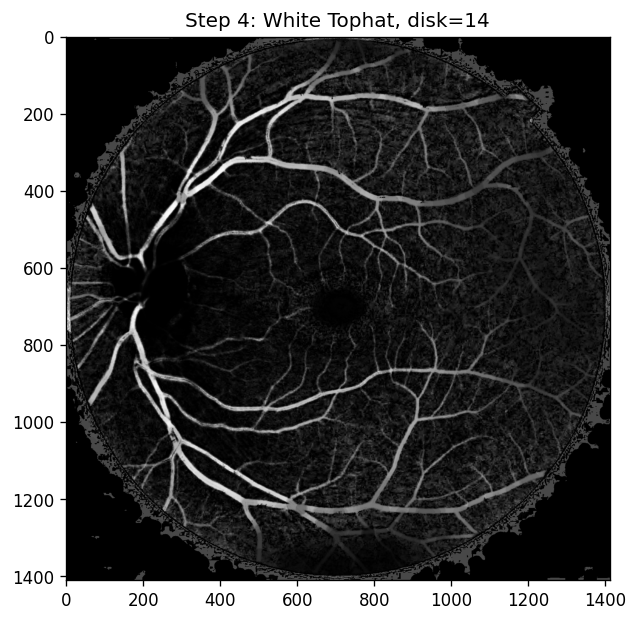

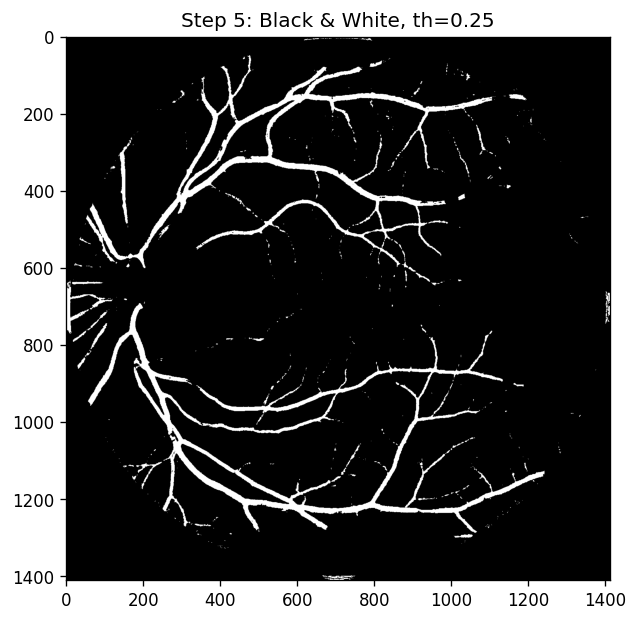

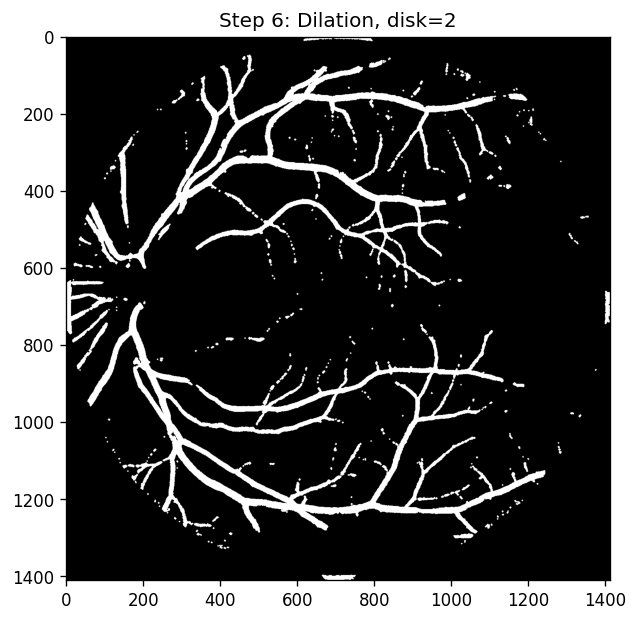

In [20]:
app = org.copy()

for i, (title, transform) in enumerate( pipeline.items(), 1 ):
    app = transform( app )
    show( app, f'Step {i}: ' + title )
    

In [21]:
final = org[:,:,1].copy()
final[ app.astype('bool') ] = 255

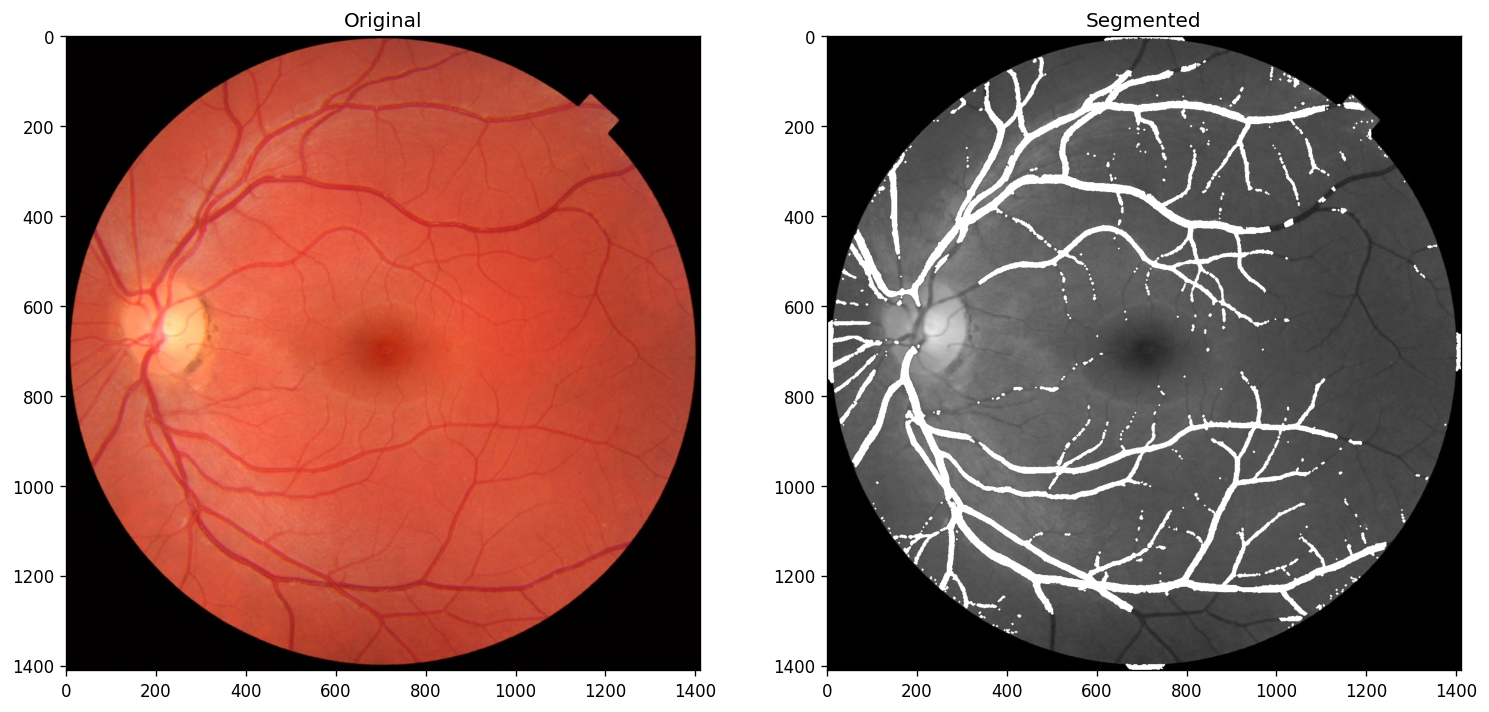

In [22]:
plt.figure(figsize=(15, 10), dpi=120)

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(org)

plt.subplot(1, 2, 2)
plt.title('Segmented')
plt.imshow(final, cmap='gray')

## Wnioski

* Większość rozwiązań tego zadania, które znalazłem, bazują się na wykorzystaniu sieci neuronowych, ale byłem zaskoczony tym że udało się osiągnąć rozsądnych wyników przy użyciu samej morfologii i progowania

* Straciłem część informacji o obrazie, używając wyłącznie warstwy zielonej. Dopuszczam że wykorzystanie całego zestawu danych może ulepszyć wyniki

* Końcowa operacja Dilation nie łączy wszystkich punktów maski. Można to zmienić, zwiększajac rozmiar footprintu (disk), ale wtedy dobrze wyodrębnione naczynia stają się zbyt "grube" i zaszumiają obraz. Użytą wartość uznaję za kompromis

* Ostatecznie jestem zadowolony z wyników segmentacji

# Zadanie 3

 Opracuj metode do wyzaczania i zliczania liczby kosci na podanych obrazach (ta samam matoda ma dzialac na 2 obrazach):

 Sprawdz nr swojego indeksu:
 - ostatnia cyfra to 3 lub 6
  - obraz a) https://drive.google.com/file/d/1UnP7f51GpMeskeIDdlID6LhpZcRJxihN/view?usp=sharing
  - obraz b) https://drive.google.com/file/d/19gvnGs3emD_0MCb6AxoA9MWSAShHMZeD/view?usp=sharing


### Preparations

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import io
from skimage.filters import threshold_otsu
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk
from skimage.color import label2rgb, rgb2gray
from skimage.measure import label, regionprops

In [24]:
def show( img, title, tr=True ):
    if tr:
        img = np.transpose(img, (1, 0, 2)) if img.ndim == 3 else img.T
    plt.title(title)
    plt.imshow(img, cmap='gray')

def show_pair( img_1, img_2, title_1='Before', title_2='After', tr=True ):
    plt.figure(figsize=(15, 5), dpi=80)
    plt.subplot(1, 2, 1)
    show( img_1, title_1, tr )
    plt.subplot(1, 2, 2)
    show( img_2, title_2, tr )

def hist_pair( img1, img2 ):
    plt.figure(figsize=(16, 3), dpi=80)
    
    plt.subplot(1, 2, 1)
    th = threshold_otsu(img1)
    plt.hist(img1.ravel(), bins=10)
    plt.axvline(th, color='r')

    plt.subplot(1, 2, 2)
    th = threshold_otsu(img2)
    plt.hist(img2.ravel(), bins=10)
    plt.axvline(th, color='r')
    plt.tight_layout()

def normalize( img ):
    a = np.sort(img.ravel()).searchsorted( img )
    return (a - np.min(a)) / np.max(a)

def black_white( arr, th ):
    arr[ arr >= th ] = 1
    arr[ arr < th ] = 0
    return arr

### Original images (RGB)

In [25]:
org_1 = np.array(io.imread('https://sun9-69.userapi.com/impf/k-1IY-IBxGCd2Z7GvlNw3O2h9FsNBCaHjARpHQ/TEAgdFR84jw.jpg?size=311x437&quality=96&sign=f84ef8f0e3b2b21860ac55155c392317&type=album'))
org_2 = np.array(io.imread('https://sun6-23.userapi.com/impf/dSro5ADpR4ItBbcuBscggGYwscnnmIFd9-y5fA/gVQxQbHZgYc.jpg?size=248x393&quality=96&sign=cdec54201e987150f8fac73947b53524&type=album'))

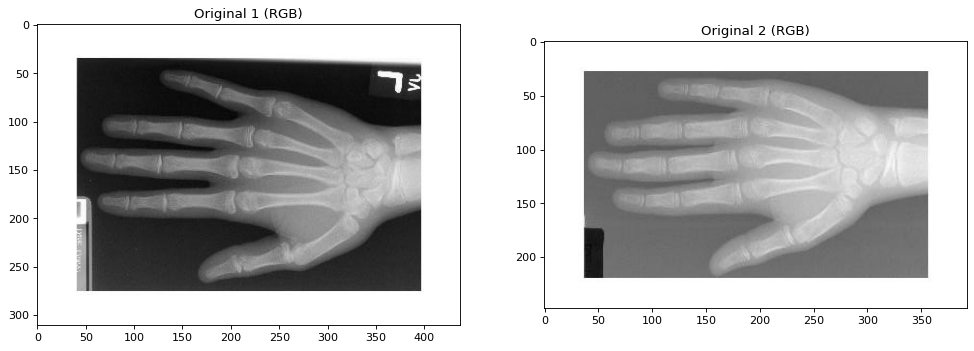

In [26]:
show_pair( org_1, org_2, 'Original 1 (RGB)', 'Original 2 (RGB)' )

### Histograms for both hands

Mimo tego że obrazy wydają się czarno-białe, są faktycznie zakodowane jako RGB (histogramy składowych poniżej).

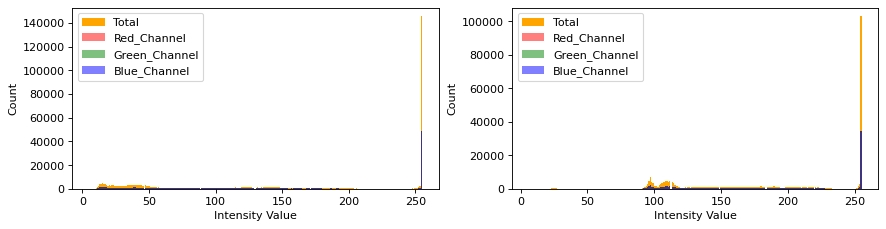

In [27]:
plt.figure(figsize=(13, 3), dpi=80)
for i in range(2):
    plt.subplot(1, 2, i+1)
    image = [org_1, org_2][i]
    plt.hist(image.ravel(), bins = 256, color = 'orange', )
    plt.hist(image[:, :, 0].ravel(), bins = 256, color = 'Red', alpha = 0.5)
    plt.hist(image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
    plt.hist(image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
    plt.xlabel('Intensity Value')
    plt.ylabel('Count')
    plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])

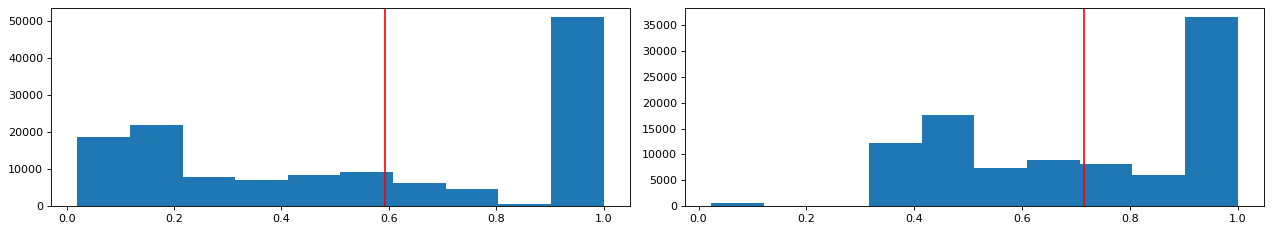

In [28]:
# Histogramy w skali szarości

hist_pair( rgb2gray(org_1), rgb2gray(org_2) )

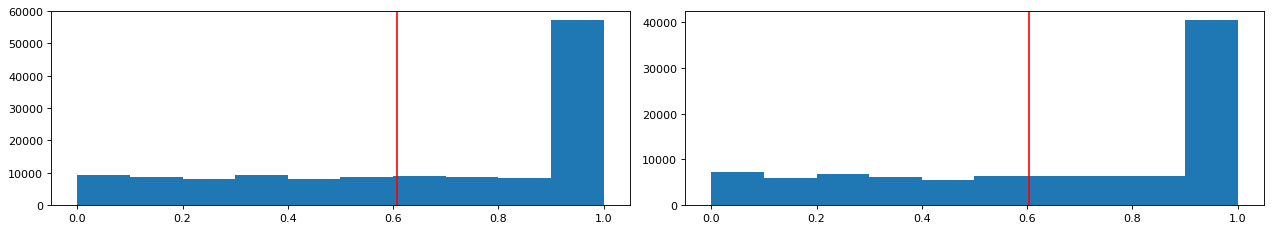

In [29]:
# Znormalizowane histogramy

hist_pair( normalize(rgb2gray(org_1)), normalize(rgb2gray(org_2)) )

### Pipeline

Szereg operacji, przez które przechodzą oryginalne obrazy. 

* Grayscale: przekodowanie do skali szarości
* Histogram Normalization: spłaszcza histogram
* White Tophat: zostawia same koście
* Opening: łączy regiony w obszary z zaokrąglonymi kątami
* Black & White: zwiększa kontrast

In [30]:
pipeline = {
            
            'Grayscale': rgb2gray,
            'Histogram Normalization': normalize,
            'White Tophat, disk=11': lambda arr: white_tophat(arr, disk(11)),
            'Black & White, th=0.1': lambda arr: black_white( arr, th=0.1 ),
            'Opening, disk=3': lambda arr: opening(arr, disk(3)),
            'Black & White, th=0.10': lambda arr: black_white( arr, th=0.1 ),
            # 'Opening, disk=5': lambda arr: opening(arr, disk(3)),
            # 'Black & White, th=0.100': lambda arr: black_white( arr, th=0.101 ),
}

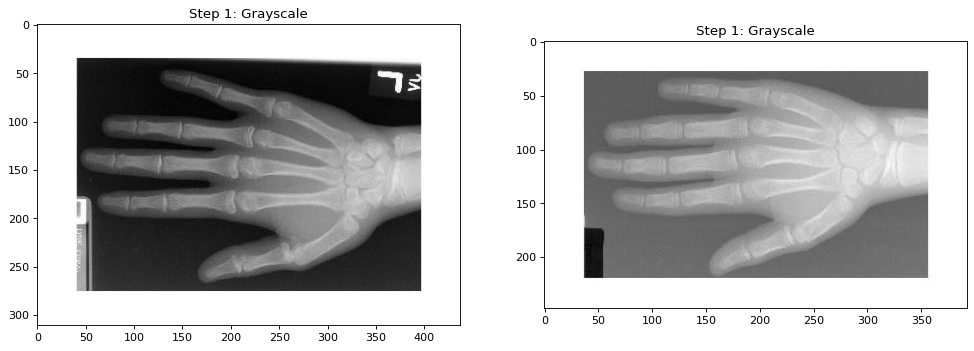

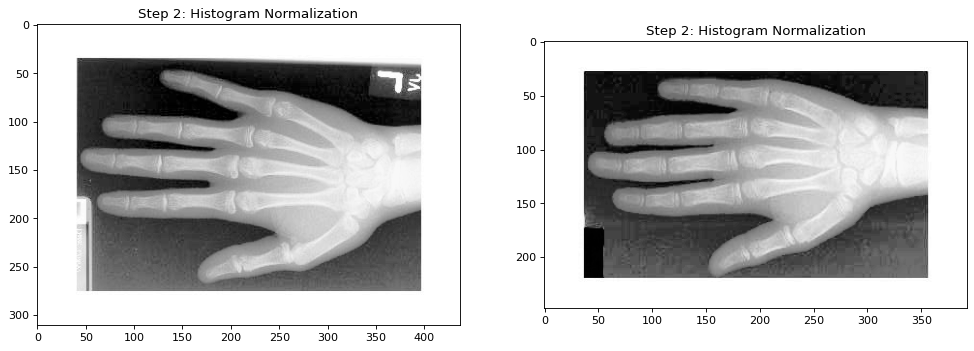

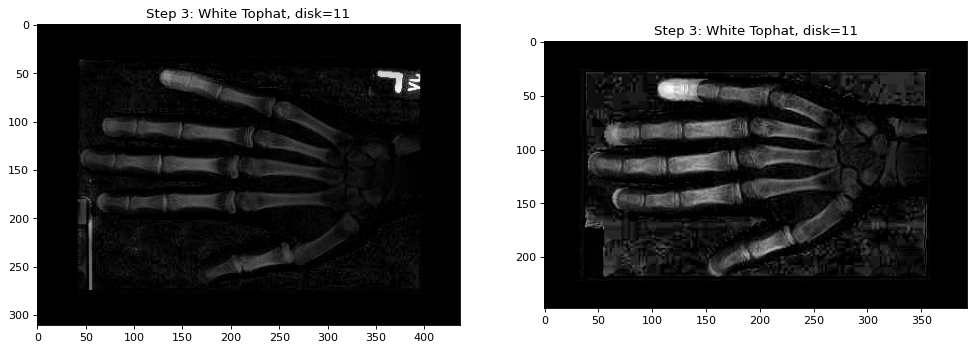

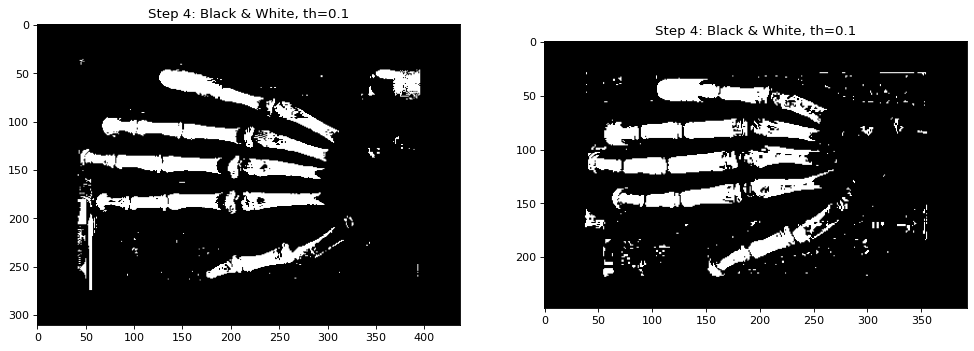

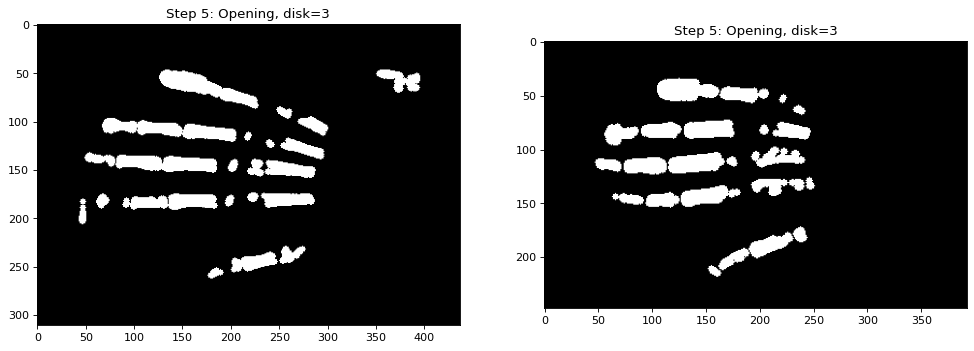

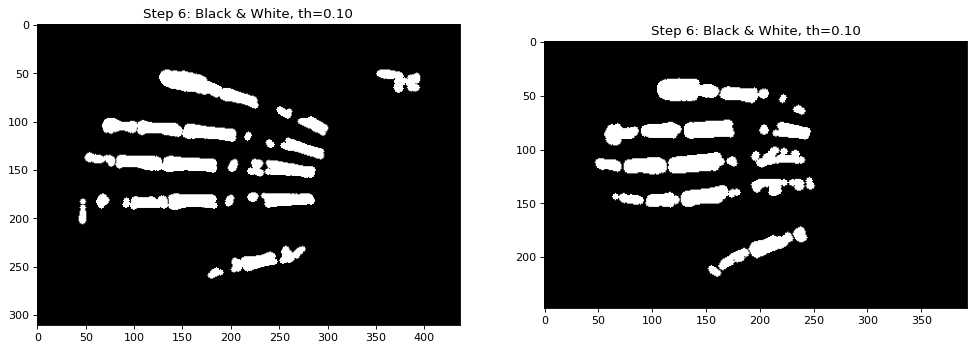

In [31]:
app_1 = org_1.copy()
app_2 = org_2.copy()
for i, (title, transform) in enumerate( pipeline.items(), 1 ):
    app_1 = transform( app_1 )
    app_2 = transform( app_2 )
    plt.figure(figsize=(15, 5), dpi=80)
    plt.subplot(1, 2, 1)
    show( app_1, f'Step {i}: ' + title )
    plt.subplot(1, 2, 2)
    show( app_2, f'Step {i}: ' + title )


### Highlight

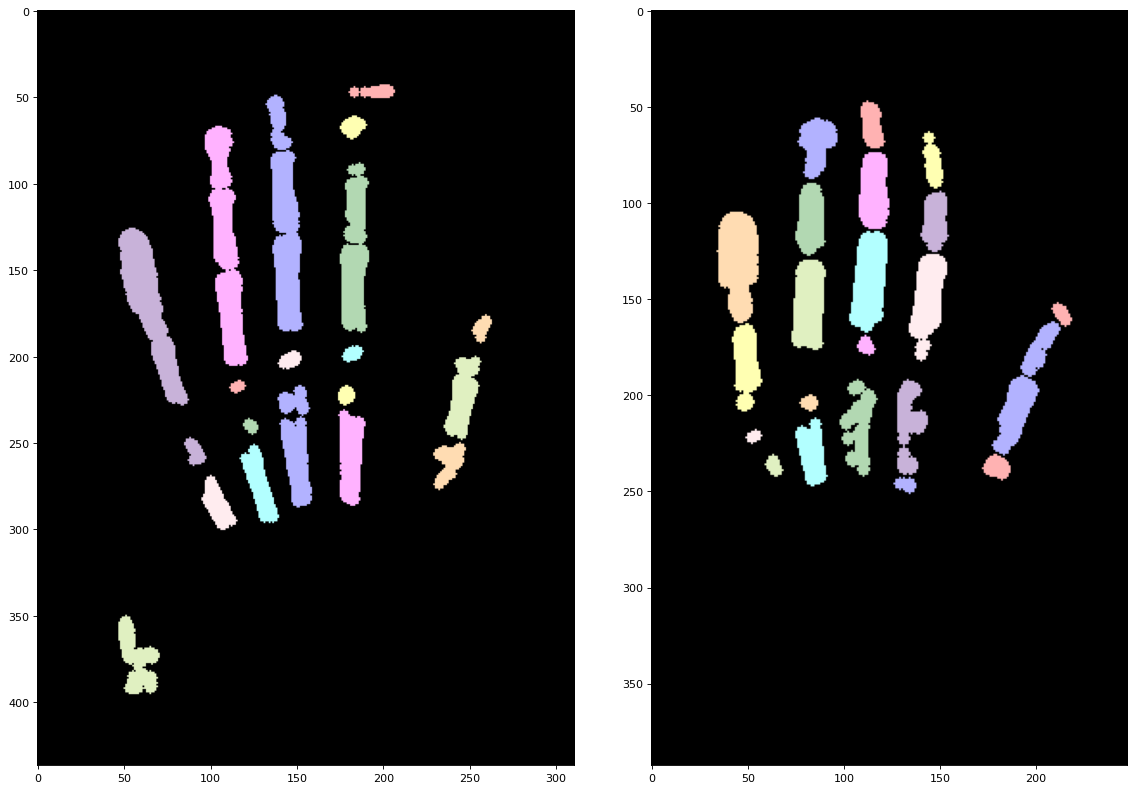

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10), dpi=80)

lab_1 = label(app_1)
color_app_1 = label2rgb(lab_1, image=app_1, bg_label=0)
ax[0].imshow( color_app_1, cmap='gray' )

lab_2 = label(app_2)
color_app_2 = label2rgb(lab_2, image=app_2, bg_label=0)
ax[1].imshow( color_app_2, cmap='gray' )

fig.tight_layout()


### Bounding boxes

Image 1: Found 16 regions with the area >= 100
Image 2: Found 16 regions with the area >= 100


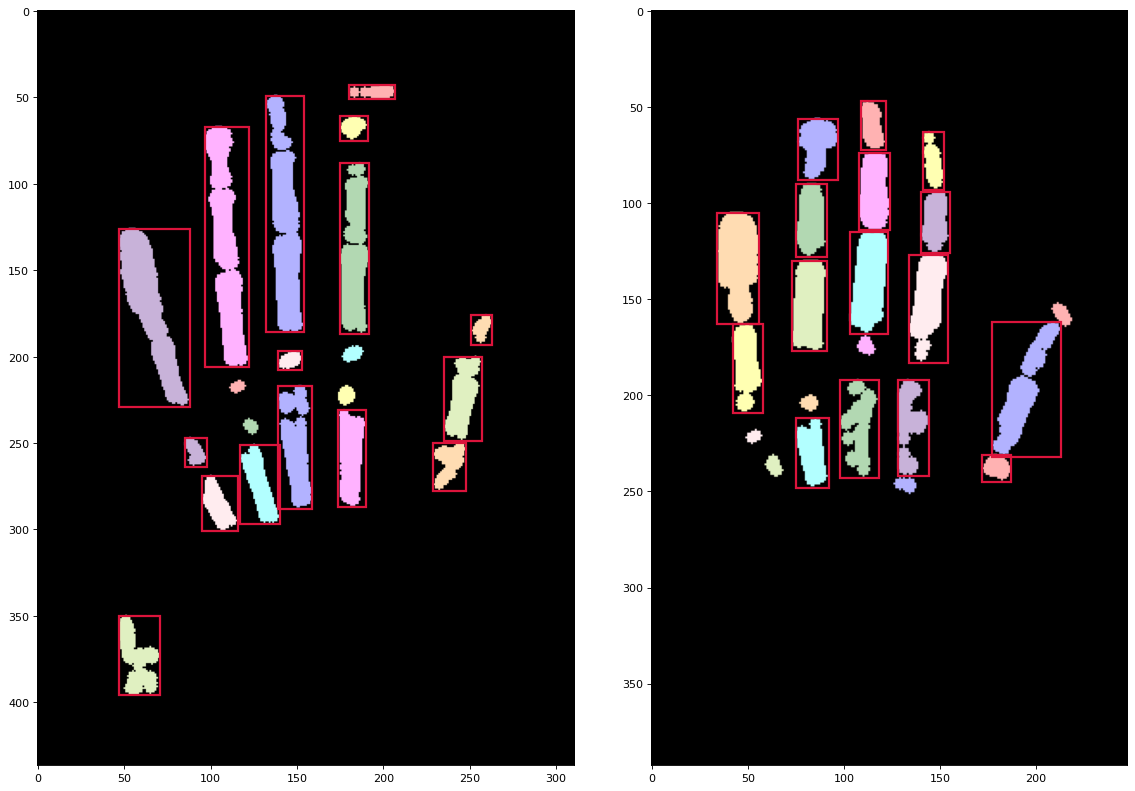

In [33]:
th = 100

for i in range(2):
    bones = 0
    for region in regionprops([lab_1, lab_2][i]):
            
            if region.area >= th:
                bones += 1
                minr, minc, maxr, maxc = region.bbox
                rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                        fill=False, edgecolor='crimson', linewidth=2)
                ax[i].add_patch(rect)
    print( f'Image {i+1}: Found {bones} regions with the area >= {th}' )
fig


### Overlay

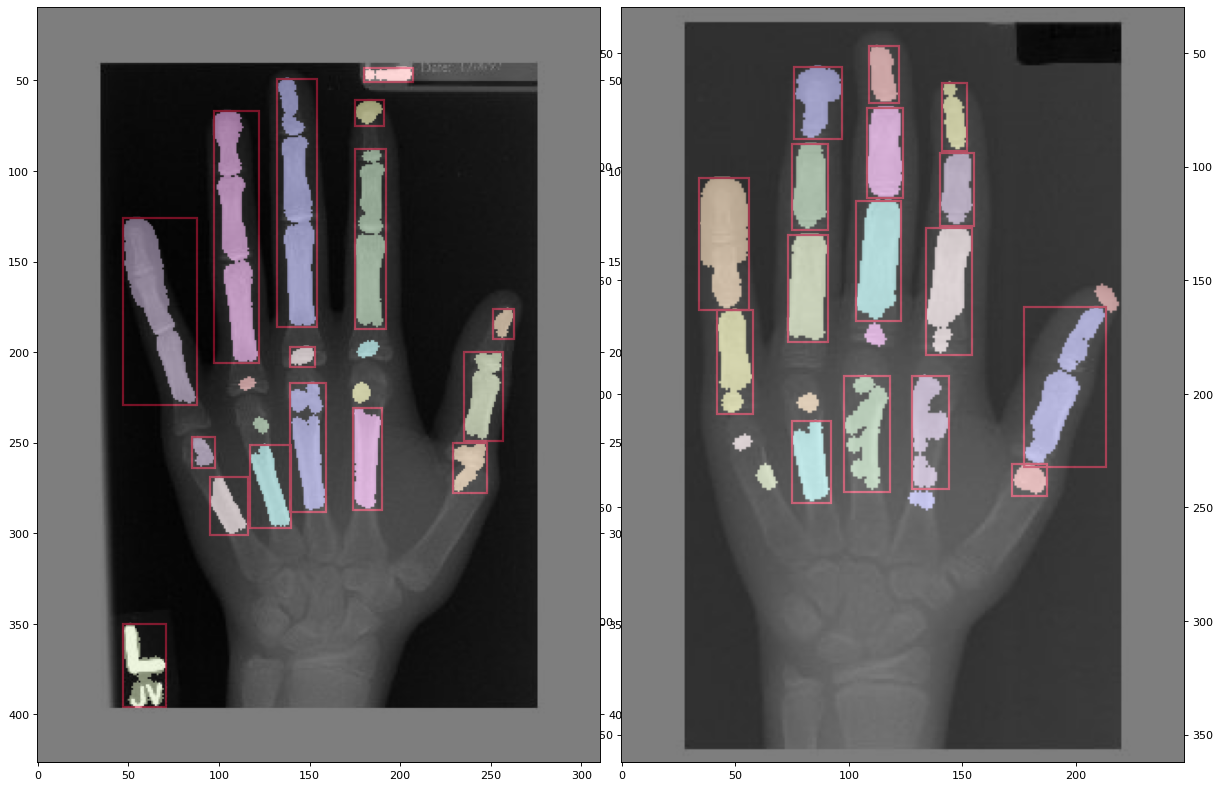

In [34]:
ax[0].twinx().imshow( org_1, cmap='gray', alpha=0.5 )
ax[1].twinx().imshow( org_2, cmap='gray', alpha=0.5 )
fig

### Wnioski

* Obrazy są zbyt skomplikowane, żeby szuktecznie można byłoby stosować zwykłe metody progowania (probowałem try_all_threshold - żadna z tych metod nie wyprodukowała zadowolających wyników).

* Operacja normalizacji histogramów znacznie pomaga przed operacją White Tophat, ponieważ trochę wyrównuje dystrybucje jasnych i ciemnych pikseli.

* Lepsze wyodrębnienie poszczególnych kości zależy od doboru rodzaju oraz wartości footprint przy zastosowaniu morfologii. Dobrane parametry często wliczają różne kości do jednego regionu. Lepsze parametry umożliwiły by również rozpoznanie kości poniżej palców, które niestety zostały pominione przez przedstawiony pipeline.